## 2. Verifying the CLT & LLN

In [1]:
# Import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# Load the dataset
df = pd.read_csv("Data/winequality-red.csv")

In [12]:
# Select the variable to demonstrate the CLT
x = df['alcohol'].dropna().values  # Remove NaN values if any

In [24]:
# Define sample sizes
sample_sizes = [10, 50, 200, 500]

# Define number of resamples per sample size
num_samples = 10000

### CLT

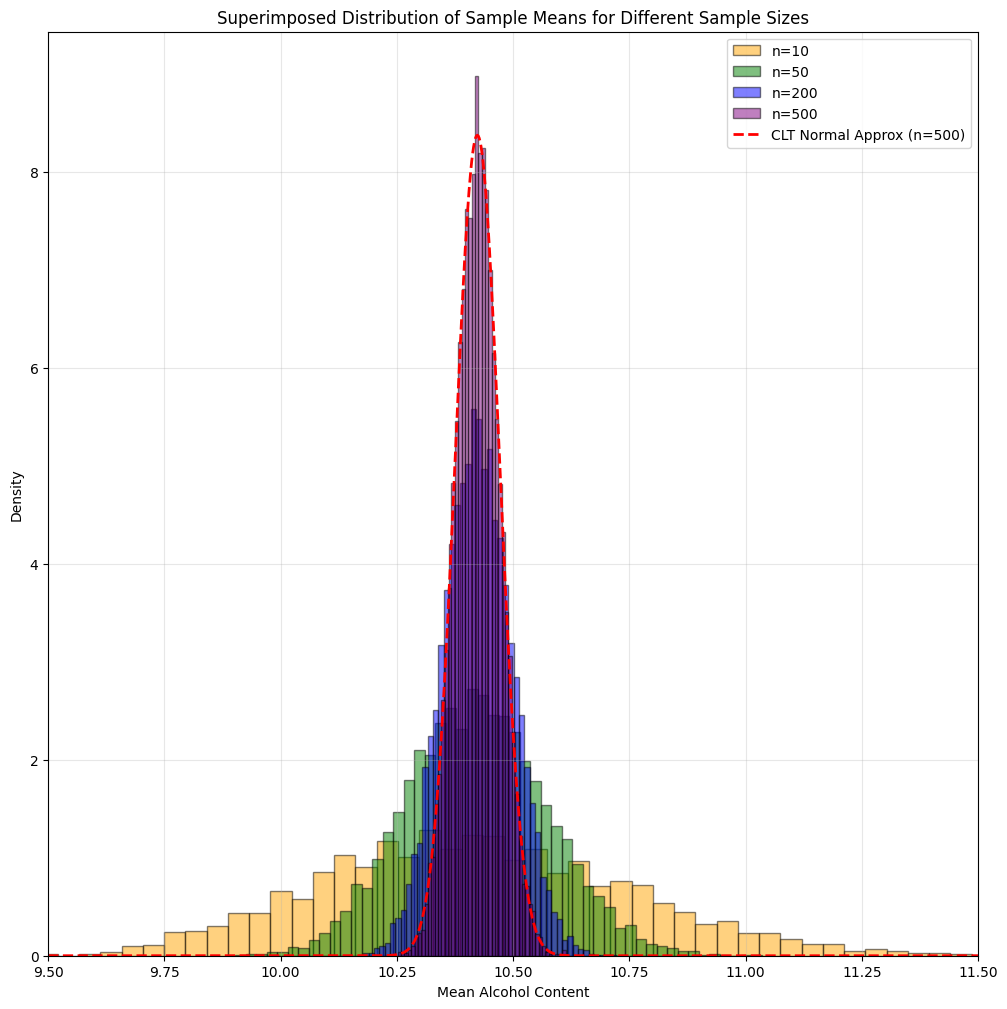

In [27]:
# Dictionary to store sample means
sample_means = {size: [] for size in sample_sizes}

# Generate sample means for each sample size
for size in sample_sizes:
    for _ in range(num_samples):
        sample = np.random.choice(x, size=size, replace=True)  # Bootstrap resampling
        sample_means[size].append(np.mean(sample))

# Compute population mean and standard deviation
pop_mean = np.mean(x)
pop_std = np.std(x, ddof=1)  # Sample standard deviation

# Plot: Superimposed distribution of sample means
plt.figure(figsize=(12, 12))

colors = ['orange', 'green', 'blue', 'purple']
for i, size in enumerate(sample_sizes):
    plt.hist(sample_means[size], bins=50, alpha=0.5, density=True, color=colors[i], label=f'n={size}', edgecolor='black')

# Plot the CLT Normal Approximation (n=1000)
x_values = np.linspace(9.5, 11.5, 1000)
y_values = stats.norm.pdf(x_values, loc=pop_mean, scale=pop_std / np.sqrt(500))
plt.plot(x_values, y_values, 'r--', label='CLT Normal Approx (n=500)', linewidth=2)

# Formatting
plt.xlabel("Mean Alcohol Content")
plt.ylabel("Density")
plt.xlim(9.5, 11.5)
plt.title("Superimposed Distribution of Sample Means for Different Sample Sizes")
plt.legend()
plt.grid(alpha=0.3)
plt.show()